In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BankData = pd.read_csv(r'BankData.csv')
display(BankData)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


### STEPS: DATA VISUALIZATION
1. Find relations between the features and the outcome variable 'Exited'
2. Find relations between the features themselves
3. Visualize categorical data

#### <center> CHURN RATE VISUALS </center>

In [3]:
churnValues = BankData['Exited'].value_counts()
churnDist   = [churnValues[0] / sum(churnValues) * 100, churnValues[1] / sum(churnValues) * 100]

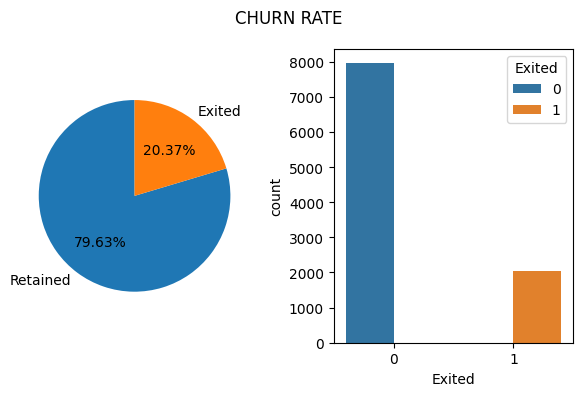

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.pie(churnDist,
        labels=['Retained', 'Exited'],
        startangle=90,
        autopct = '%1.2f%%',
)

sns.countplot(
    x='Exited',
    hue='Exited',
    data=BankData,
    ax=axs[1]
)

fig.suptitle('CHURN RATE')
plt.tight_layout()
plt.show()

#### ANALYSIS:
1. Majority (79.63%) of people were retained
---

#### <center> FEATURE INTER-RELATIONS </center>

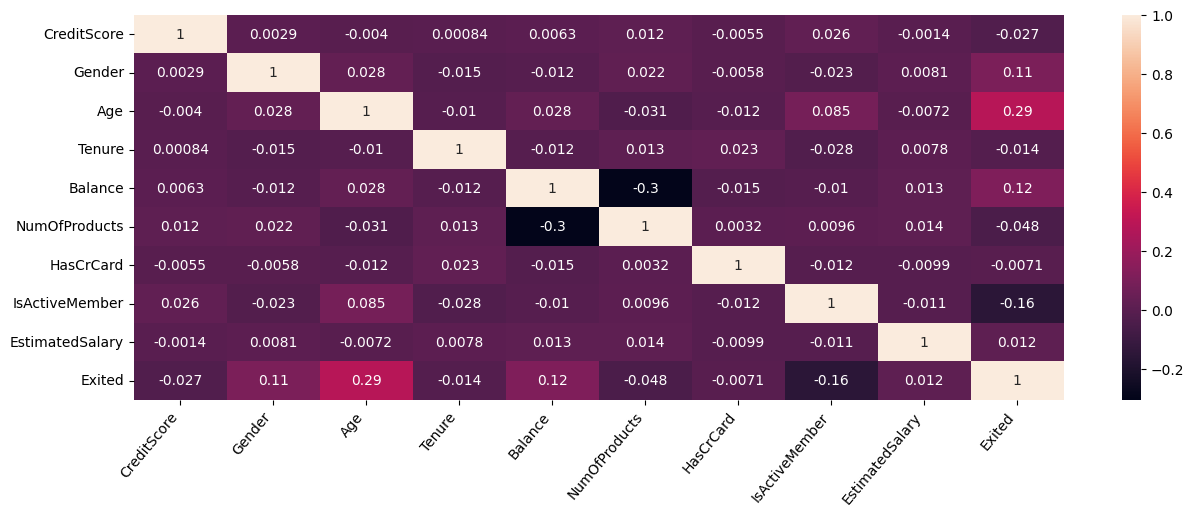

In [5]:
plt.figure(figsize=(15, 5))

sns.heatmap(BankData.corr(), annot=True)

plt.xticks(rotation=50, ha='right')
plt.show()

#### ANALYSIS:
1. Age, Balance, and Gender appear to have a minor positive linear relationship with the exit/churn status
2. isActiveMember is the only feature to have a considerable negative linear relationship with churn status
3. numOfProducts and Balance have a negative linear relationship
4. Tenure and HasCrCard show the lowest relation to churn status
---

#### <center> DISTRIBUTIONS W.R.T CHURN RATE (A) </center>

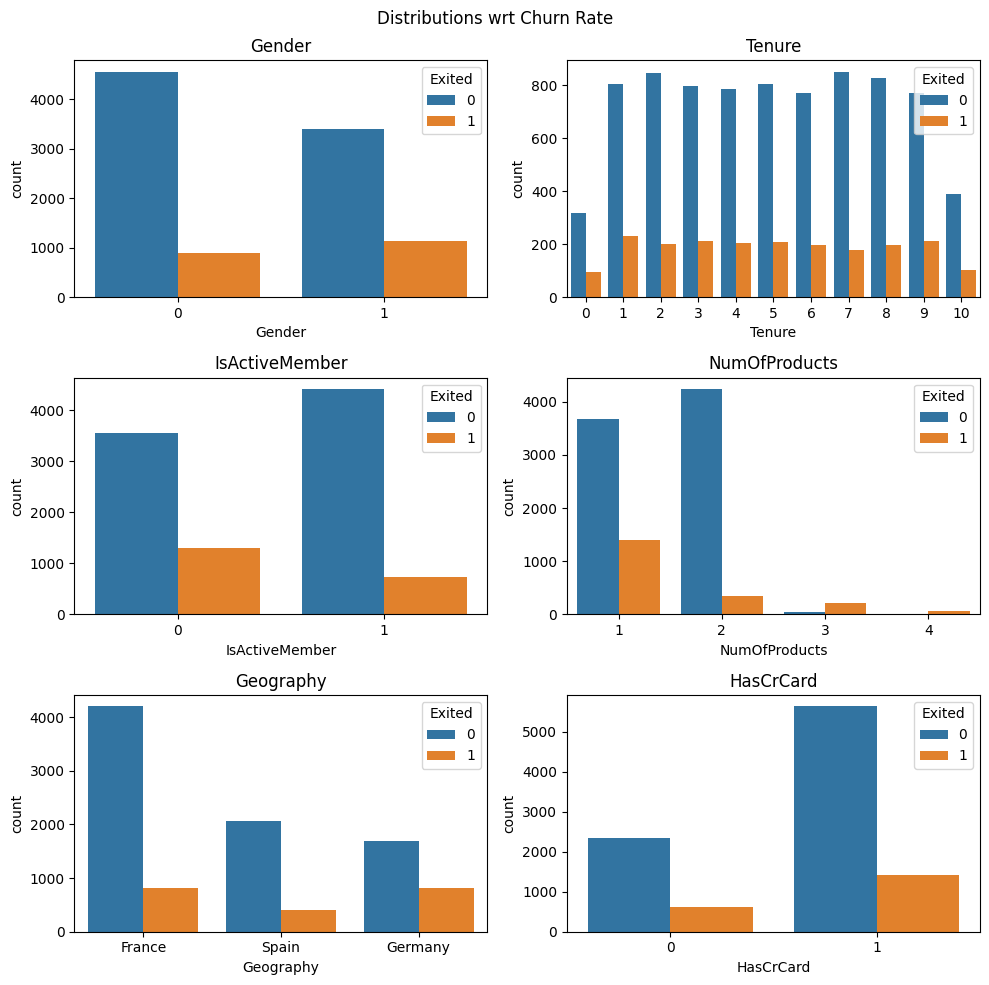

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

columns = BankData[['Gender', 'Tenure', 'IsActiveMember', 'NumOfProducts', 'Geography', 'HasCrCard']]

for i, column in enumerate(columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(
        x=column,
        data=BankData,
        hue='Exited',
        ax=ax
    )
    ax.set_title(column)

fig.suptitle('Distributions wrt Churn Rate')
plt.tight_layout()
plt.show()

#### ANALYSIS:
1. Proportion of people churning seems to increase with the number of products purchased
2. Geographically, Germany appears to have higher churn rate compared to france and spain
3. The churn rate of women appears to be lesser than that of men
---

#### <center> DISTRIBUTIONS W.R.T CHURN RATE (B)</center>

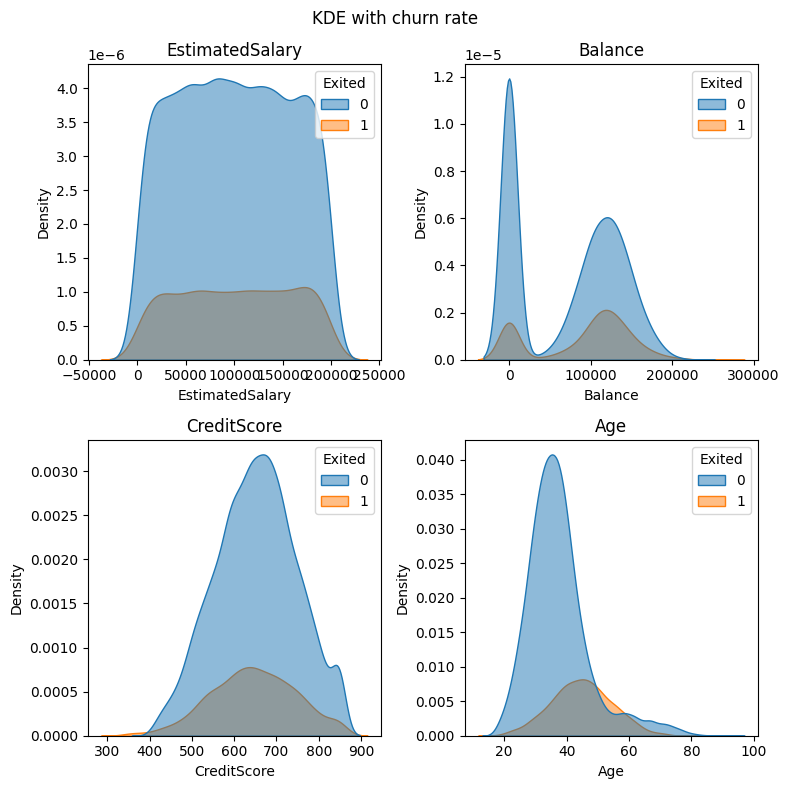

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

columns2 = BankData[['EstimatedSalary', 'Balance', 'CreditScore', 'Age']]

for i, column in enumerate(columns2):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(
        data=BankData,
        x=column,
        fill=True,
        alpha=0.5,
        hue='Exited',
        ax=ax
    )
    ax.set_title(f'{column}')

fig.suptitle('KDE with churn rate')
plt.tight_layout()
plt.show()

#### ANALYSIS:
1. a higher **credit score** visibly leads to lower churn rates
2. with zero **balance**, churn rate is shown to be very low. in the other band of balance range, a similar trend follows but with lesser intensity
3. There is a clear difference in the **age** ranges for churn rate
4. churn rate decreases significantly with increase in **salary**
---

#### <center>SPECIFIC RELATIONSHIPS</center>

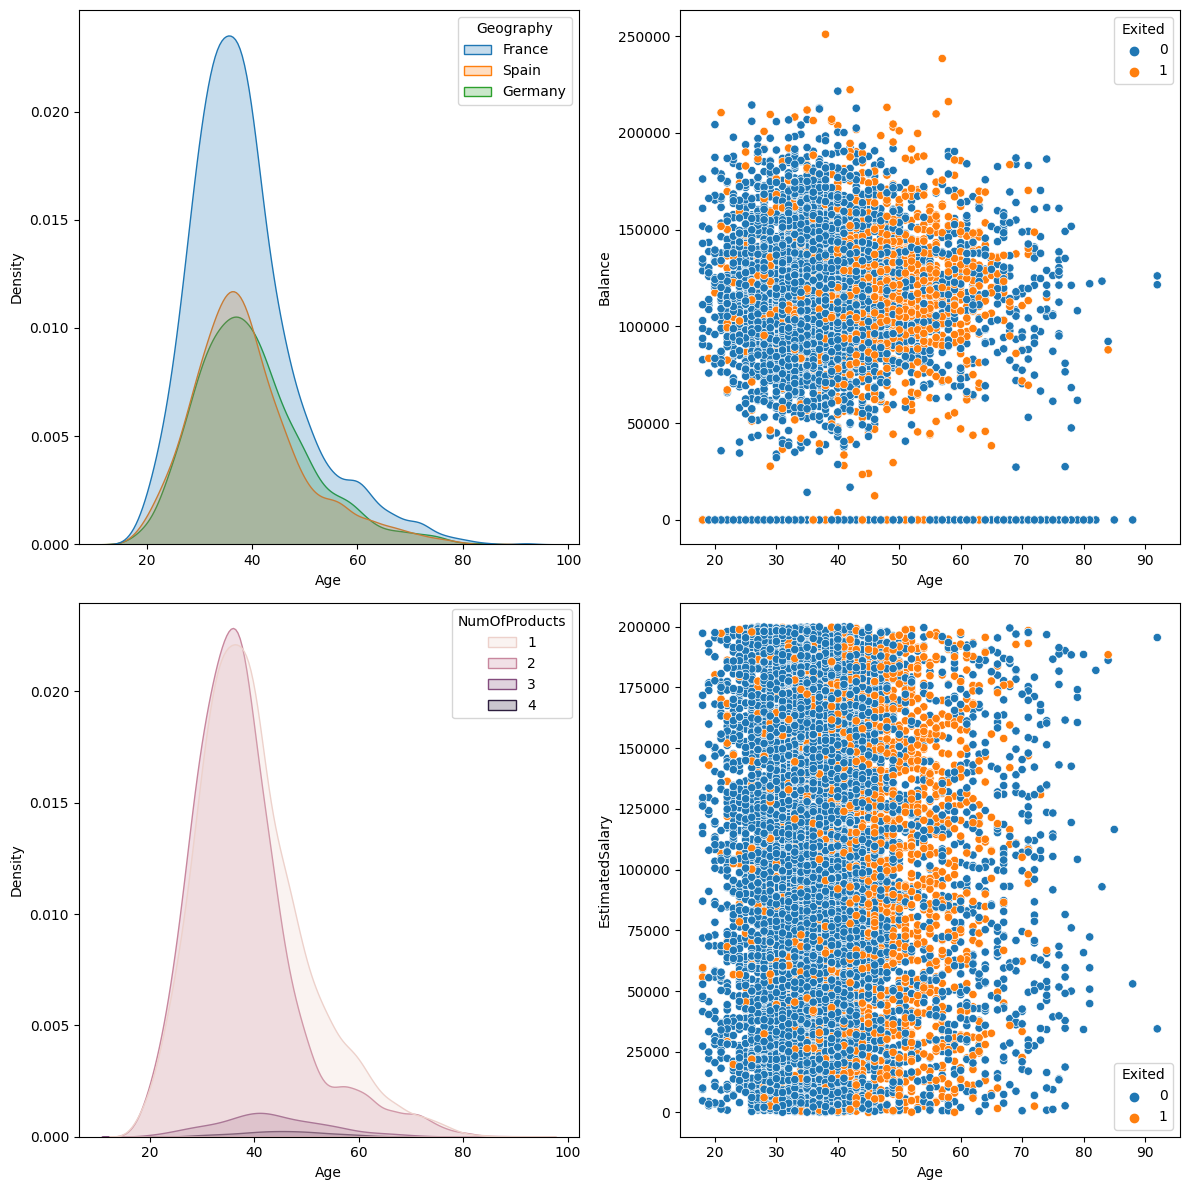

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.kdeplot(
    x='Age',
    fill=True,
    hue='Geography',
    ax=axs[0,0],
    data=BankData
)

sns.kdeplot(
    x='Age',
    fill=True,
    hue='NumOfProducts',
    ax=axs[1,0],
    data=BankData
)

sns.scatterplot(
    x='Age',
    y='Balance',
    hue='Exited',
    ax=axs[0,1],
    data=BankData
)

sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Exited',
    ax=axs[1,1],
    data=BankData
)

plt.tight_layout()
plt.show()

#### ANALYSIS:
1. The Average age of users from France, Germany and Spain appears to be very similar
2. The Number of products bought by users highly depends on age, with 2 products bought being the most common trait
3. As age increases, Balance of user approaches a median value
4. The estimatedSalary appears random with age as not enough data is available for extreme ages (<20 and >60)
---

### CONCLUSIONS:
* Age, Gender, Balance, NumOfProducts, Geography, IsActiveMember are significant features that may be used for predictive modelling

In [ ]:
features = BankData[['Age', 'Gender', 'Balance', 'NumOfProducts', 'Geography', 'IsActiveMember', 'Exited']]

features.to_csv("features.csv", index=False)